In [8]:
import xgboost
import joblib
import numpy as np
from sklearn.metrics import accuracy_score
from quadratic_weighted_kappa import quadratic_weighted_kappa
import pandas as pd

In [9]:
#x = joblib.load('essay_ease10_sbert768_simbow_langerr_780')
x = joblib.load('essay_ease10_sbert768_simbow_langerr_780_normalized_asap4')
y = joblib.load("score_asap4")

In [10]:
x.shape

(1772, 780)

In [12]:
def get_feature_names_extended():
    ease_feats = ['Answer Length', 'Word Counts', 'Average Word Length', 'Good n-gram', 'Prompt Overlap',
              'Prompt Overlap (synonyms)', 'Punctuation Counts', 'Spelling Error', 'Unique Words', 'Prompt Similarity SBert']

    sbert_feats = []
    sbert_dim = 768

    for i in range(0, sbert_dim):
    	fname = "sbert_" + str(i) 
    	sbert_feats.append(fname)
    
    prompt_similarity_bow = ["Prompt Similarity BOW"]
    lang_error = ["Language Error"]
    
    feature_names = ease_feats + prompt_similarity_bow + lang_error + sbert_feats 

    print("len feature names: ", len(feature_names))
    
    return feature_names

feature_names = get_feature_names_extended()

len feature names:  780


In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(kf)

KFold(n_splits=5, random_state=42, shuffle=True)


In [6]:
model2 = xgboost.XGBRegressor(objective ='reg:squarederror',
                colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [8]:
qwk_scores = []

test_indices = []
pred_labels = []

for train_index, test_index in kf.split(x, y):
#     print("train_index: ", len(train_index))
#     print("test_index: ", len(test_index))
#     print("train_index: ", train_index[:20])
#     print("test_index: ", test_index[:20])
    
    X_train, X_test, Y_train, Y_test = x[train_index], x[test_index], y[train_index], y[test_index]

    #d_train = xgboost.DMatrix(X_train, label=Y_train, feature_names=feature_names)
    #d_test = xgboost.DMatrix(X_test, label=Y_test, feature_names=feature_names)
         
    model2.fit(X_train, Y_train)
    
    #rf.fit(X_train, Y_train)
    
    #predict = model.predict(d_test)
    predict = model2.predict(X_test)
    #predict = rf.predict(X_test)
    predict = np.round(predict)
    
    pred_labels.extend(predict)
    test_indices.extend(test_index)

    result = quadratic_weighted_kappa(Y_test, predict)
    
    print("Qwk : ", result)
    
    qwk_scores.append(result)
    
    
np.mean(qwk_scores)

Qwk :  0.7889320832380516
Qwk :  0.7567900610151411
Qwk :  0.7580874081394493
Qwk :  0.7500549157435592
Qwk :  0.8139692013175305


0.7735667338907464

In [9]:
print(len(pred_labels))
print(len(test_indices))

1772
1772


In [10]:
pred_labels_int = list(map(int, pred_labels))
print(pred_labels)
print(pred_labels_int)

[1.0, 1.0, 1.0, 1.0, 3.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 3.0, 2.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 0.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 0.0, 3.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0.0, 3.0, -0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 0.0, 0.0, 0.0, 2.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 0.0, 0.0, 1.0, 2.0, 3.0, 1.0, -0.0, 0.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 0.0, 0.0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 0.0, 2.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 1.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.

In [11]:
new_score = np.zeros(1772)
new_score

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
new_score[test_indices] = pred_labels_int

In [13]:
new_score

array([0., 1., 3., ..., 1., 0., 1.])

In [14]:
new_score[60]

3.0

In [15]:
joblib.dump(new_score, 'score_model_normalized')

['score_model_normalized']

## Create model

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape

(1417, 780)

In [13]:
d_train = xgboost.DMatrix(X_train, label=Y_train, feature_names=feature_names)
d_test = xgboost.DMatrix(X_test, label=Y_test, feature_names=feature_names)

In [18]:
model = xgboost.train({"learning_rate": 0.05, "max_depth":3}, d_train, 200, evals = [(d_test, "test")], early_stopping_rounds=20)

[0]	test-rmse:1.24196
Will train until test-rmse hasn't improved in 20 rounds.
[1]	test-rmse:1.19260
[2]	test-rmse:1.14574
[3]	test-rmse:1.10231
[4]	test-rmse:1.06064
[5]	test-rmse:1.02219
[6]	test-rmse:0.98662
[7]	test-rmse:0.95263
[8]	test-rmse:0.92042
[9]	test-rmse:0.89026
[10]	test-rmse:0.86194
[11]	test-rmse:0.83588
[12]	test-rmse:0.81170
[13]	test-rmse:0.78882
[14]	test-rmse:0.76793
[15]	test-rmse:0.74838
[16]	test-rmse:0.73016
[17]	test-rmse:0.71304
[18]	test-rmse:0.69769
[19]	test-rmse:0.68379
[20]	test-rmse:0.67098
[21]	test-rmse:0.65892
[22]	test-rmse:0.64777
[23]	test-rmse:0.63769
[24]	test-rmse:0.62780
[25]	test-rmse:0.61876
[26]	test-rmse:0.60965
[27]	test-rmse:0.60213
[28]	test-rmse:0.59526
[29]	test-rmse:0.58877
[30]	test-rmse:0.58277
[31]	test-rmse:0.57711
[32]	test-rmse:0.57191
[33]	test-rmse:0.56725
[34]	test-rmse:0.56292
[35]	test-rmse:0.55893
[36]	test-rmse:0.55468
[37]	test-rmse:0.55141
[38]	test-rmse:0.54876
[39]	test-rmse:0.54633
[40]	test-rmse:0.54406
[41]	test-

In [19]:
yxgb_pred = model.predict(d_test)
yxgb_pred = np.round(yxgb_pred)

In [20]:
accuracy_score(yxgb_pred, Y_test)

0.7126760563380282

In [21]:
quadratic_weighted_kappa(yxgb_pred, Y_test)

0.8087303566974309

## Model interpretation

In [22]:
imp_vals = model.get_fscore()
#print(imp_vals)
feature_important = model.get_score(importance_type='weight')
feats_sorted = sorted(feature_important.items(), key=lambda x: x[1], reverse=True)
aa_25 = feats_sorted[:25]

In [23]:
x_axis = [i[0] for i in aa_25]
y_axis = [i[1] for i in aa_25]

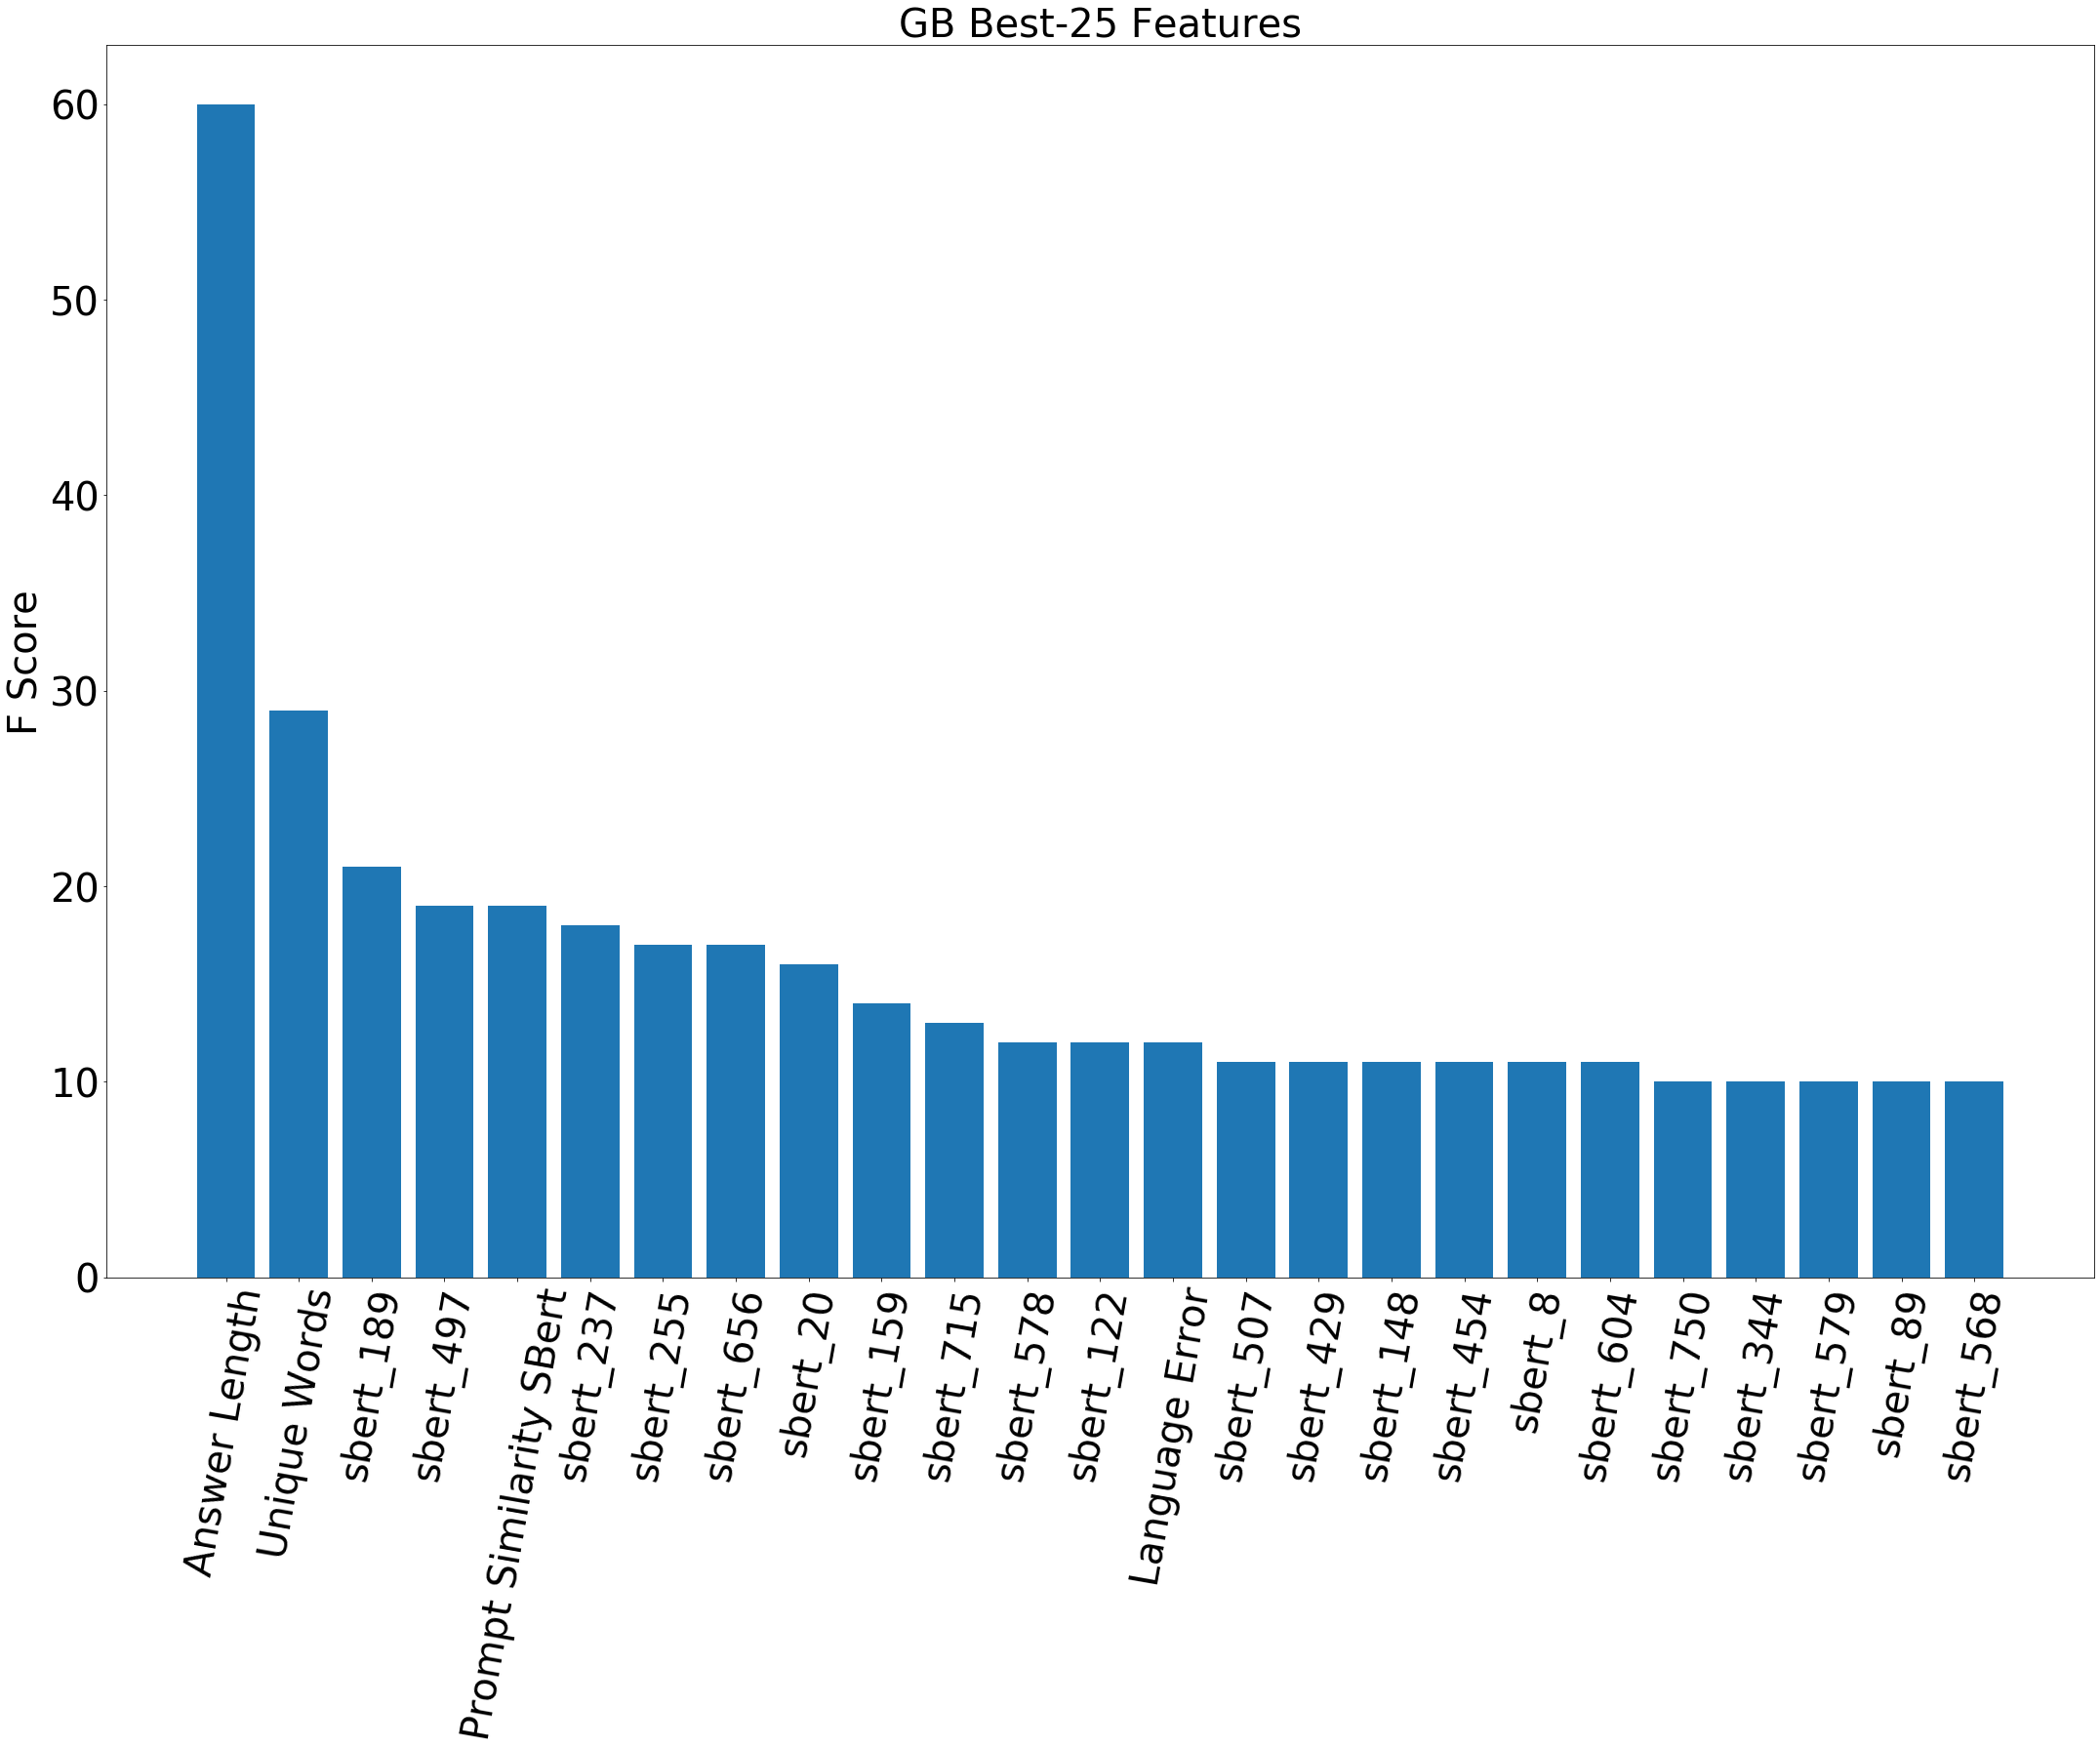

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,25))
plt.title("GB Best-25 Features", fontsize=40)
plt.bar(x_axis, y_axis, width=0.8, align='center')
plt.xticks(x_axis, fontsize=40, rotation=80)
plt.ylabel("F Score", fontsize=40)
plt.yticks(fontsize=40)
plt.tight_layout()
plt.savefig('gb_best_25.png')
plt.show()